In [48]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [49]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [50]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (442, 10)
y shape: (442,)


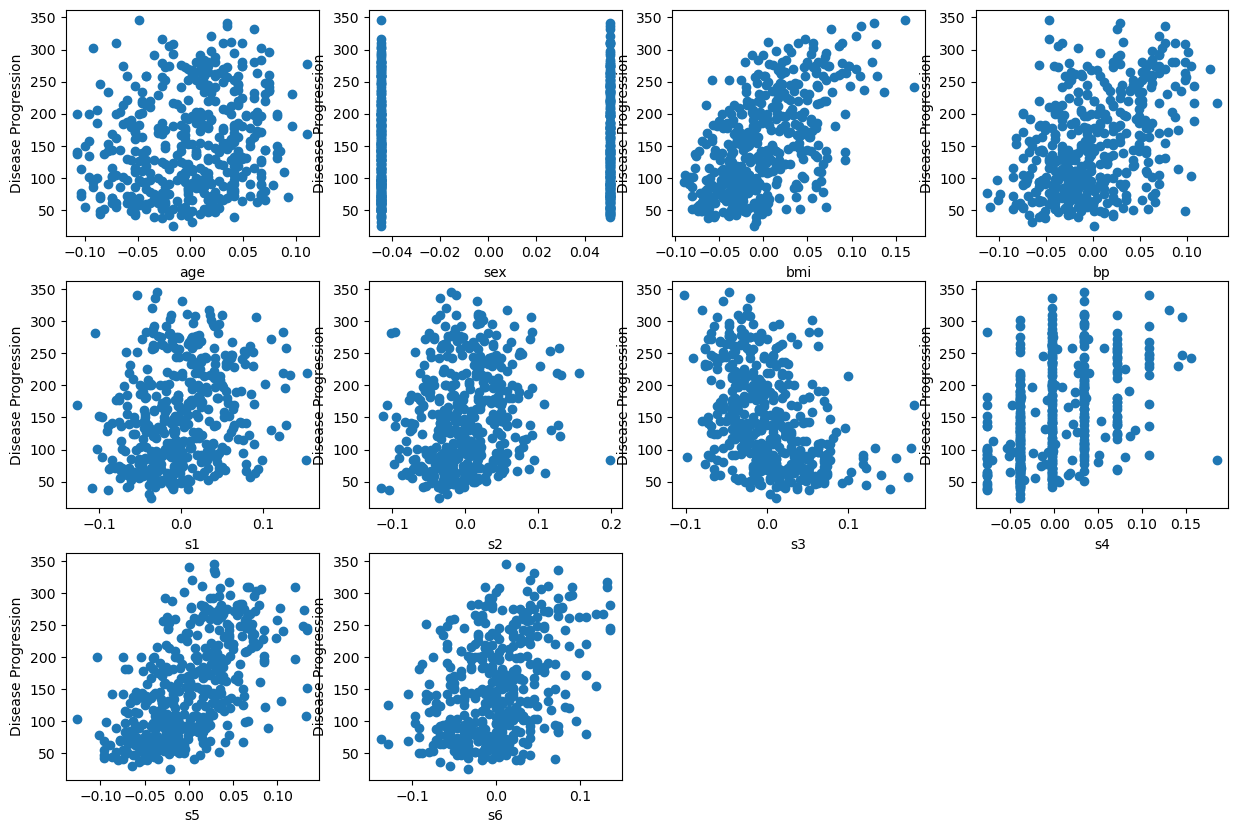

In [51]:
# Create exactly the right number of subplots: 3x4 grid
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.ravel()

# Plot for each feature
for i, feature in enumerate(diabetes.feature_names):
    axes[i].scatter(X[:, i], y)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Disease Progression')

# Remove the last two subplots (since 3x4=12 but we only have 10 features)
axes[-1].remove()
axes[-2].remove()

plt.show()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

- ### LinearRegression()

In [54]:


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

cv_scores = cross_val_score(lr_model, X_train, y_train, cv=10)

print("CV scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

cv scores: [ 0.54112036  0.51944565  0.32490281  0.44505807  0.4002621   0.59269279
  0.73166525  0.48323211 -0.16203456  0.36550331]
Mean CV Score: 0.42418479041273854


- ### RandomForest()

In [56]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10)

print("CV scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

cv scores: [0.46317969 0.3916445  0.2466876  0.0943572  0.40071406 0.53746988
 0.64364659 0.43814012 0.14194002 0.46825824]
Mean CV Score: 0.3826037908496593


- ### ScaledLinearRegression()

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LinearRegression()
lr_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=10)

print("CV scores:", lr_scores)
print("Mean CV Score:", lr_scores.mean())

CV scores: [ 0.54112036  0.51944565  0.32490281  0.44505807  0.4002621   0.59269279
  0.73166525  0.48323211 -0.16203456  0.36550331]
Mean CV Score: 0.4241847904127387


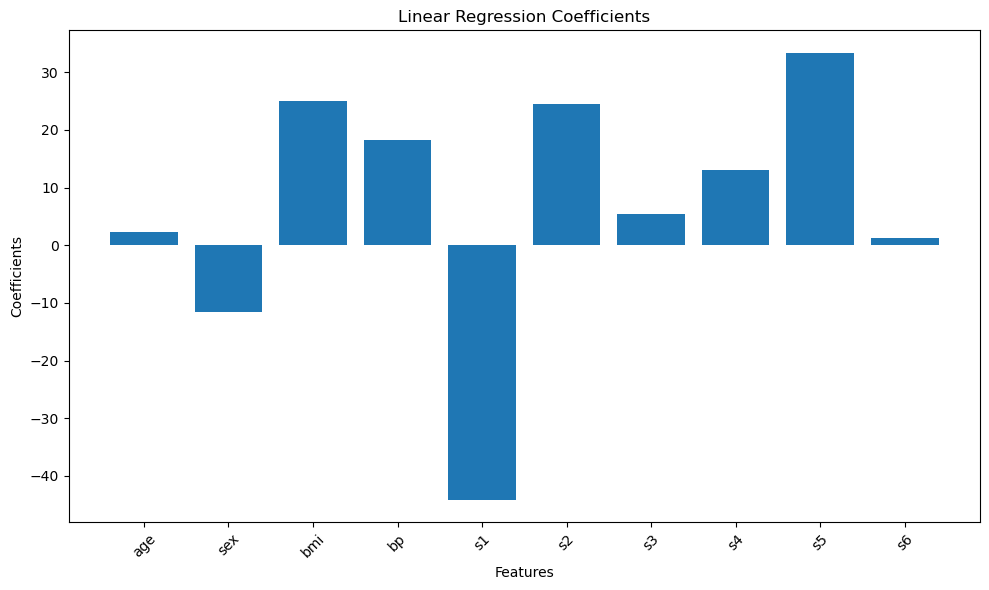

In [63]:
# First fit the model on the scaled data
lr_model.fit(X_train_scaled, y_train)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(diabetes.feature_names, lr_model.coef_)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Linear Regression Coefficients')
plt.tight_layout()
plt.show()